In [ ]:
# pingouin
# https://partrita.github.io/posts/pingouin/

In [ ]:
# ㅁ 독립표본 평균검정
#  - 두개의 독립표본 데이터를 이용하여 각각 대응되는 두개의 모집단 평균이 서로 동일한지 검정
#  - 두 집단이 서로 차이가 있는지 검정

In [1]:
import pandas as pd
import numpy as np
import pingouin as pg

c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
# 1.1. One-sample T-test
mu = 4
x = [5.5, 2.4, 6.8, 9.6, 4.2]
pg.ttest(x, mu)
# 자유도(dof)는 4, T-value(T)는 1.3973 이며 p-Value가 일반적인 기준(0.05) 이상이기 때문에 표본 x의 평균은 모집단의 평균과 차이가 없다(귀무가설)고 볼 수 있다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.397391,4,two-sided,0.234824,"[2.32, 9.08]",0.624932,0.766,0.191796


In [24]:
# 1.2. Paired T-test
pre = [5.5, 2.4, 6.8, 9.6, 4.2]
post = [6.4, 3.4, 6.4, 11., 4.8]
print(np.mean(pre) )
print(np.mean(post) )

5.699999999999999
6.4


In [25]:
pg.ttest(pre, post, paired=True, alternative='greater')
# p-val 0.05보다 크므로 동일하다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.307832,4,greater,0.958886,"[-1.35, inf]",0.250801,0.32,0.016865


In [15]:
pg.ttest(pre, post, paired=True, alternative='two-sided')
# p-val 0.05보다 작으므로 차이가 있음

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.307832,4,two-sided,0.082228,"[-1.54, 0.14]",0.250801,1.561,0.072492


In [16]:
pg.ttest(pre, post, paired=True, alternative='less')
# p-val 0.05보다 작으므로 차이가 있음

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.307832,4,less,0.041114,"[-inf, -0.05]",0.250801,3.122,0.12048


In [26]:
# 1.3. Two-sample T-test
# 1.3.1. 표본 크기가 같은 경우
x = np.random.normal(loc=7, size=20)
y = np.random.normal(loc=4, size=20)
pg.ttest(x, y, correction = 'auto')
# p-val	0.05보다 작으므로 x,y의 평균의 차이는 존재한다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.837162,38,two-sided,5.377510e-12,"[2.44, 3.7]",3.110784,9.728e+08,1.0


In [33]:
# 1.3.2. 표본 크기가 다른경우
x = np.random.normal(loc=7, size=20)
y = np.random.normal(loc=6.5, size=15)
pg.ttest(x, y, correction='auto')
# p-val	0.05보다 크므로 x,y의 평균의 차이는 없다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.741361,30.842611,two-sided,0.464082,"[-0.4, 0.85]",0.251979,0.405,0.110559


In [34]:
# 1.4. Pearson’s correlation
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T
pg.corr(x, y)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.74441,"[0.52, 0.87]",0.000002,8966.474,0.999007


In [43]:
# 1.5. Robust correlation
# 표본 x에 아웃라이어 추가
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x, y, method="shepherd")

,n,outliers,r,CI95%,p-val,power
shepherd,30,3,0.434066,"[0.06, 0.7]",0.023684,0.638183


In [45]:
pg.corr(x, y)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.464489,"[0.13, 0.71]",0.009713,5.514,0.755222


In [46]:
# 1.6. 데이터의 정규성 테스트
# pingouin.normality()함수를 pandas의 데이터 프레임형식에 사용할 수 있습니다.
# 일변량 정규성(Univariate normality)
pg.normality(x)
# pval 0.05보다 작으므로 정규분포를 따르지 않느다.

,W,pval,normal
0,0.550503,1.911883e-08,False


In [47]:
# 다변량 정규성(Multivariate normality)
pg.multivariate_normality(np.column_stack((x, y)))

HZResults(hz=2.449772229298048, pval=3.278815932365608e-06, normal=False)

In [49]:
# 정규성 검증
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(x)

ShapiroResult(statistic=0.5505033135414124, pvalue=1.9118834515552408e-08)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

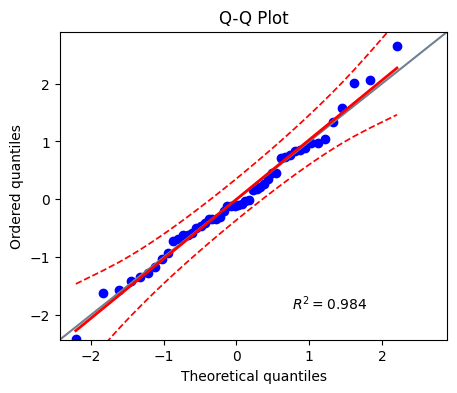

In [53]:
# 1.7. Q-Q plot 시각화
x = np.random.normal(size=50)
pg.qqplot(x, dist='norm')

In [3]:
# 1.8. One-way ANOVA
# 기본 내장되어 있는 데이터프레임(mixed_anova)을 사용합니다.
# Read an example dataset
df = pg.read_dataset('mixed_anova')
df.tail()

,Scores,Time,Group,Subject
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58
179,7.822986,June,Meditation,59


In [4]:
# Run the ANOVA
pg.anova(data=df, dv='Scores', between='Group', detailed=True)
# p-unc	 0.05보다 작으므로 귀무가설을 기각한다. 즉, Group에 딸서 평균의 차이가 존재한다.

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


In [5]:
from scipy.stats import stats
stats.f_oneway(df01['Scores'], df02['Scores'])

NameError: name 'df01' is not defined

In [25]:
# 1.9. Repeated measures ANOVA
# https://recipesds.tistory.com/entry/RMANOVA-Repeated-Measured-ANOVA-%EB%B0%98%EB%B3%B5%EC%B8%A1%EC%A0%95-ANOVA%EC%9D%98-%EC%9A%B0%EC%95%84%ED%95%A8
pg.rm_anova(data=df, dv='Scores', within='Time',
            subject='Subject', detailed=True)
# p-unc	0.02262 로 0.05보다 작으르모 Time별로 차이가 존재함

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.039981,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


In [26]:
# correction=True # 등분산성을 만족하지 못할때

In [27]:
pg.pairwise_ttests(dv='Scores', within='Time', subject='Subject', data=df)
# p-unc가 August, June 경우만 0.05보다 작으므로 해당 Case만 차이가 존재함.
# 1.10과 결과 동일함

c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Time,August,January,True,True,-1.740370,59.0,two-sided,0.087008,0.582,-0.327583
1,Time,August,June,True,True,-2.743238,59.0,two-sided,0.008045,4.232,-0.482547
2,Time,January,June,True,True,-1.023620,59.0,two-sided,0.310194,0.232,-0.169520


In [29]:
# 1.10. Post-hoc tests corrected for multiple-comparisons 다중 비교를 위해 수정된 사후 테스트
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df, dv='Scores', within='Time',
                             subject='Subject', parametric=True,
                             padjust='fdr_bh', effsize='hedges')
posthoc


c:\Users\신주현\AppData\Local\Programs\Python\Python37\lib\site-packages\pingouin\pairwise.py:27: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Time,August,January,True,True,-1.740370,59.0,two-sided,0.087008,0.130512,fdr_bh,0.582,-0.327583
1,Time,August,June,True,True,-2.743238,59.0,two-sided,0.008045,0.024134,fdr_bh,4.232,-0.482547
2,Time,January,June,True,True,-1.023620,59.0,two-sided,0.310194,0.310194,fdr_bh,0.232,-0.169520


In [30]:
# 1.11. Two-way mixed ANOVA
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df, dv='Scores', between='Group',
                     within='Time', subject='Subject',
                     correction=False, effsize="np2")
aov

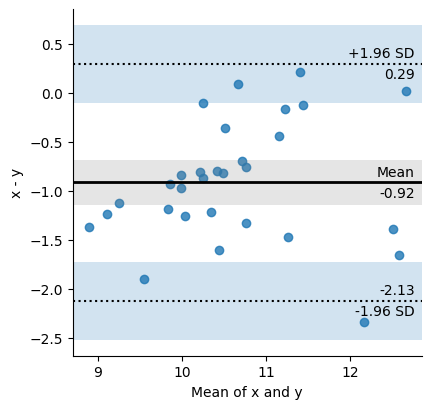

In [32]:
# 1.12. Bland-Altman plot
# https://blog.naver.com/crow83/221504979110
mean, cov = [10, 11], [[1, 0.8], [0.8, 1]]
x, y = np.random.multivariate_normal(mean, cov, 30).T
ax = pg.plot_blandaltman(x, y)

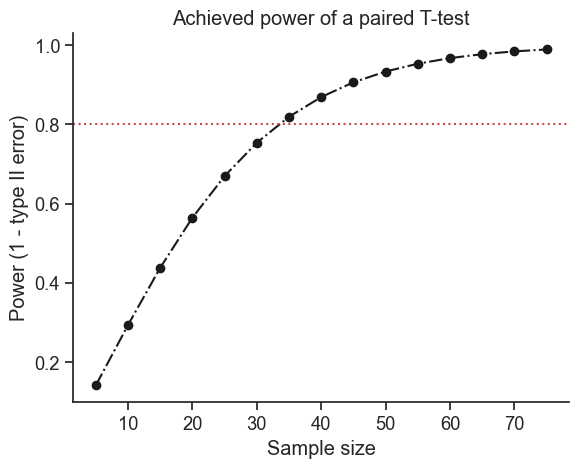

In [36]:
# 1.13. paired T-test 검정력 시각화
# T-검정의 표본 크기와 효과 크기(Cohen'd)에 따른 검정력 곡선을 시각화합니다.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', context='notebook', font_scale=1.2)
d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size
# Compute the achieved power
# pwr = pg.power_ttest(d=d, n=n, contrast='paired', tail='two-sided')
pwr = pg.power_ttest(d=d, n=n, contrast='paired', alternative='two-sided')
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

<AxesSubplot:xlabel='Time', ylabel='Scores'>

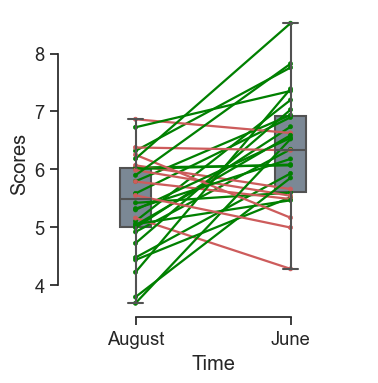

In [38]:
# 1.14. Paired plot
# mixed_anova데이터셋을 가지고 명상이 학교 성적에 미치는 영향에 대한 시각화를 해본다.
df = pg.read_dataset('mixed_anova').query(
    "Group == 'Meditation' and Time != 'January'")

pg.plot_paired(data=df, dv='Scores', within='Time',
               subject='Subject')

In [40]:
df

,Scores,Time,Group,Subject
90,5.579842,August,Meditation,30
91,5.100035,August,Meditation,31
92,4.472149,August,Meditation,32
93,4.915282,August,Meditation,33
94,6.316594,August,Meditation,34
95,5.418053,August,Meditation,35
96,5.155234,August,Meditation,36
97,6.028288,August,Meditation,37
98,4.431011,August,Meditation,38
99,4.988119,August,Meditation,39
